In [3]:
import numpy as np
import pandas as pd
from deap import algorithms

from preprocessing import preprocess_data
from setup import setup_cmaes
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, plot_fitness_over_generations

In [4]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [5]:
# CMAES algorithm parameters:
LAMBDA = 100
N_GENERATIONS = 100

# Simulation parameters:
INITIAL_MONEY = 1000
# COMMISSION = 0.0001 # 0.01%
COMMISSION = 0

In [6]:
toolbox, stats, hall_of_fame = setup_cmaes(
    stock_data,
    ta_features,
    LAMBDA,
    INITIAL_MONEY,
    COMMISSION,
)

In [7]:
final_population, logbook = algorithms.eaGenerateUpdate(
    toolbox,
    ngen=N_GENERATIONS,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg            	std           	min           	max           
0  	100   	[1085.44496516]	[203.78416013]	[652.77373055]	[1769.0874568]
1  	100   	[1161.06204452]	[225.23389879]	[708.51153957]	[1825.47513987]
2  	100   	[1175.3561672] 	[220.58605158]	[705.18793499]	[2000.18261418]
3  	100   	[1234.60070301]	[291.74525232]	[788.41958203]	[2131.21857759]
4  	100   	[1300.79288189]	[284.6733225] 	[659.58247175]	[2044.79358727]
5  	100   	[1355.04748625]	[265.24656401]	[845.5436775] 	[1977.81325876]
6  	100   	[1289.93942892]	[255.53543169]	[845.36799765]	[2213.03899165]
7  	100   	[1409.77955058]	[264.7729014] 	[820.68514184]	[2101.29528786]
8  	100   	[1392.33510515]	[275.61579883]	[699.64262972]	[2356.33762446]
9  	100   	[1442.07523243]	[302.9237584] 	[846.08722859]	[2255.27527166]
10 	100   	[1447.62213637]	[285.01437009]	[991.97008041]	[2122.99524788]
11 	100   	[1401.79051025]	[291.61568254]	[881.12176357]	[2231.73737718]
12 	100   	[1436.24905215]	[300.69418295]	[932.850648

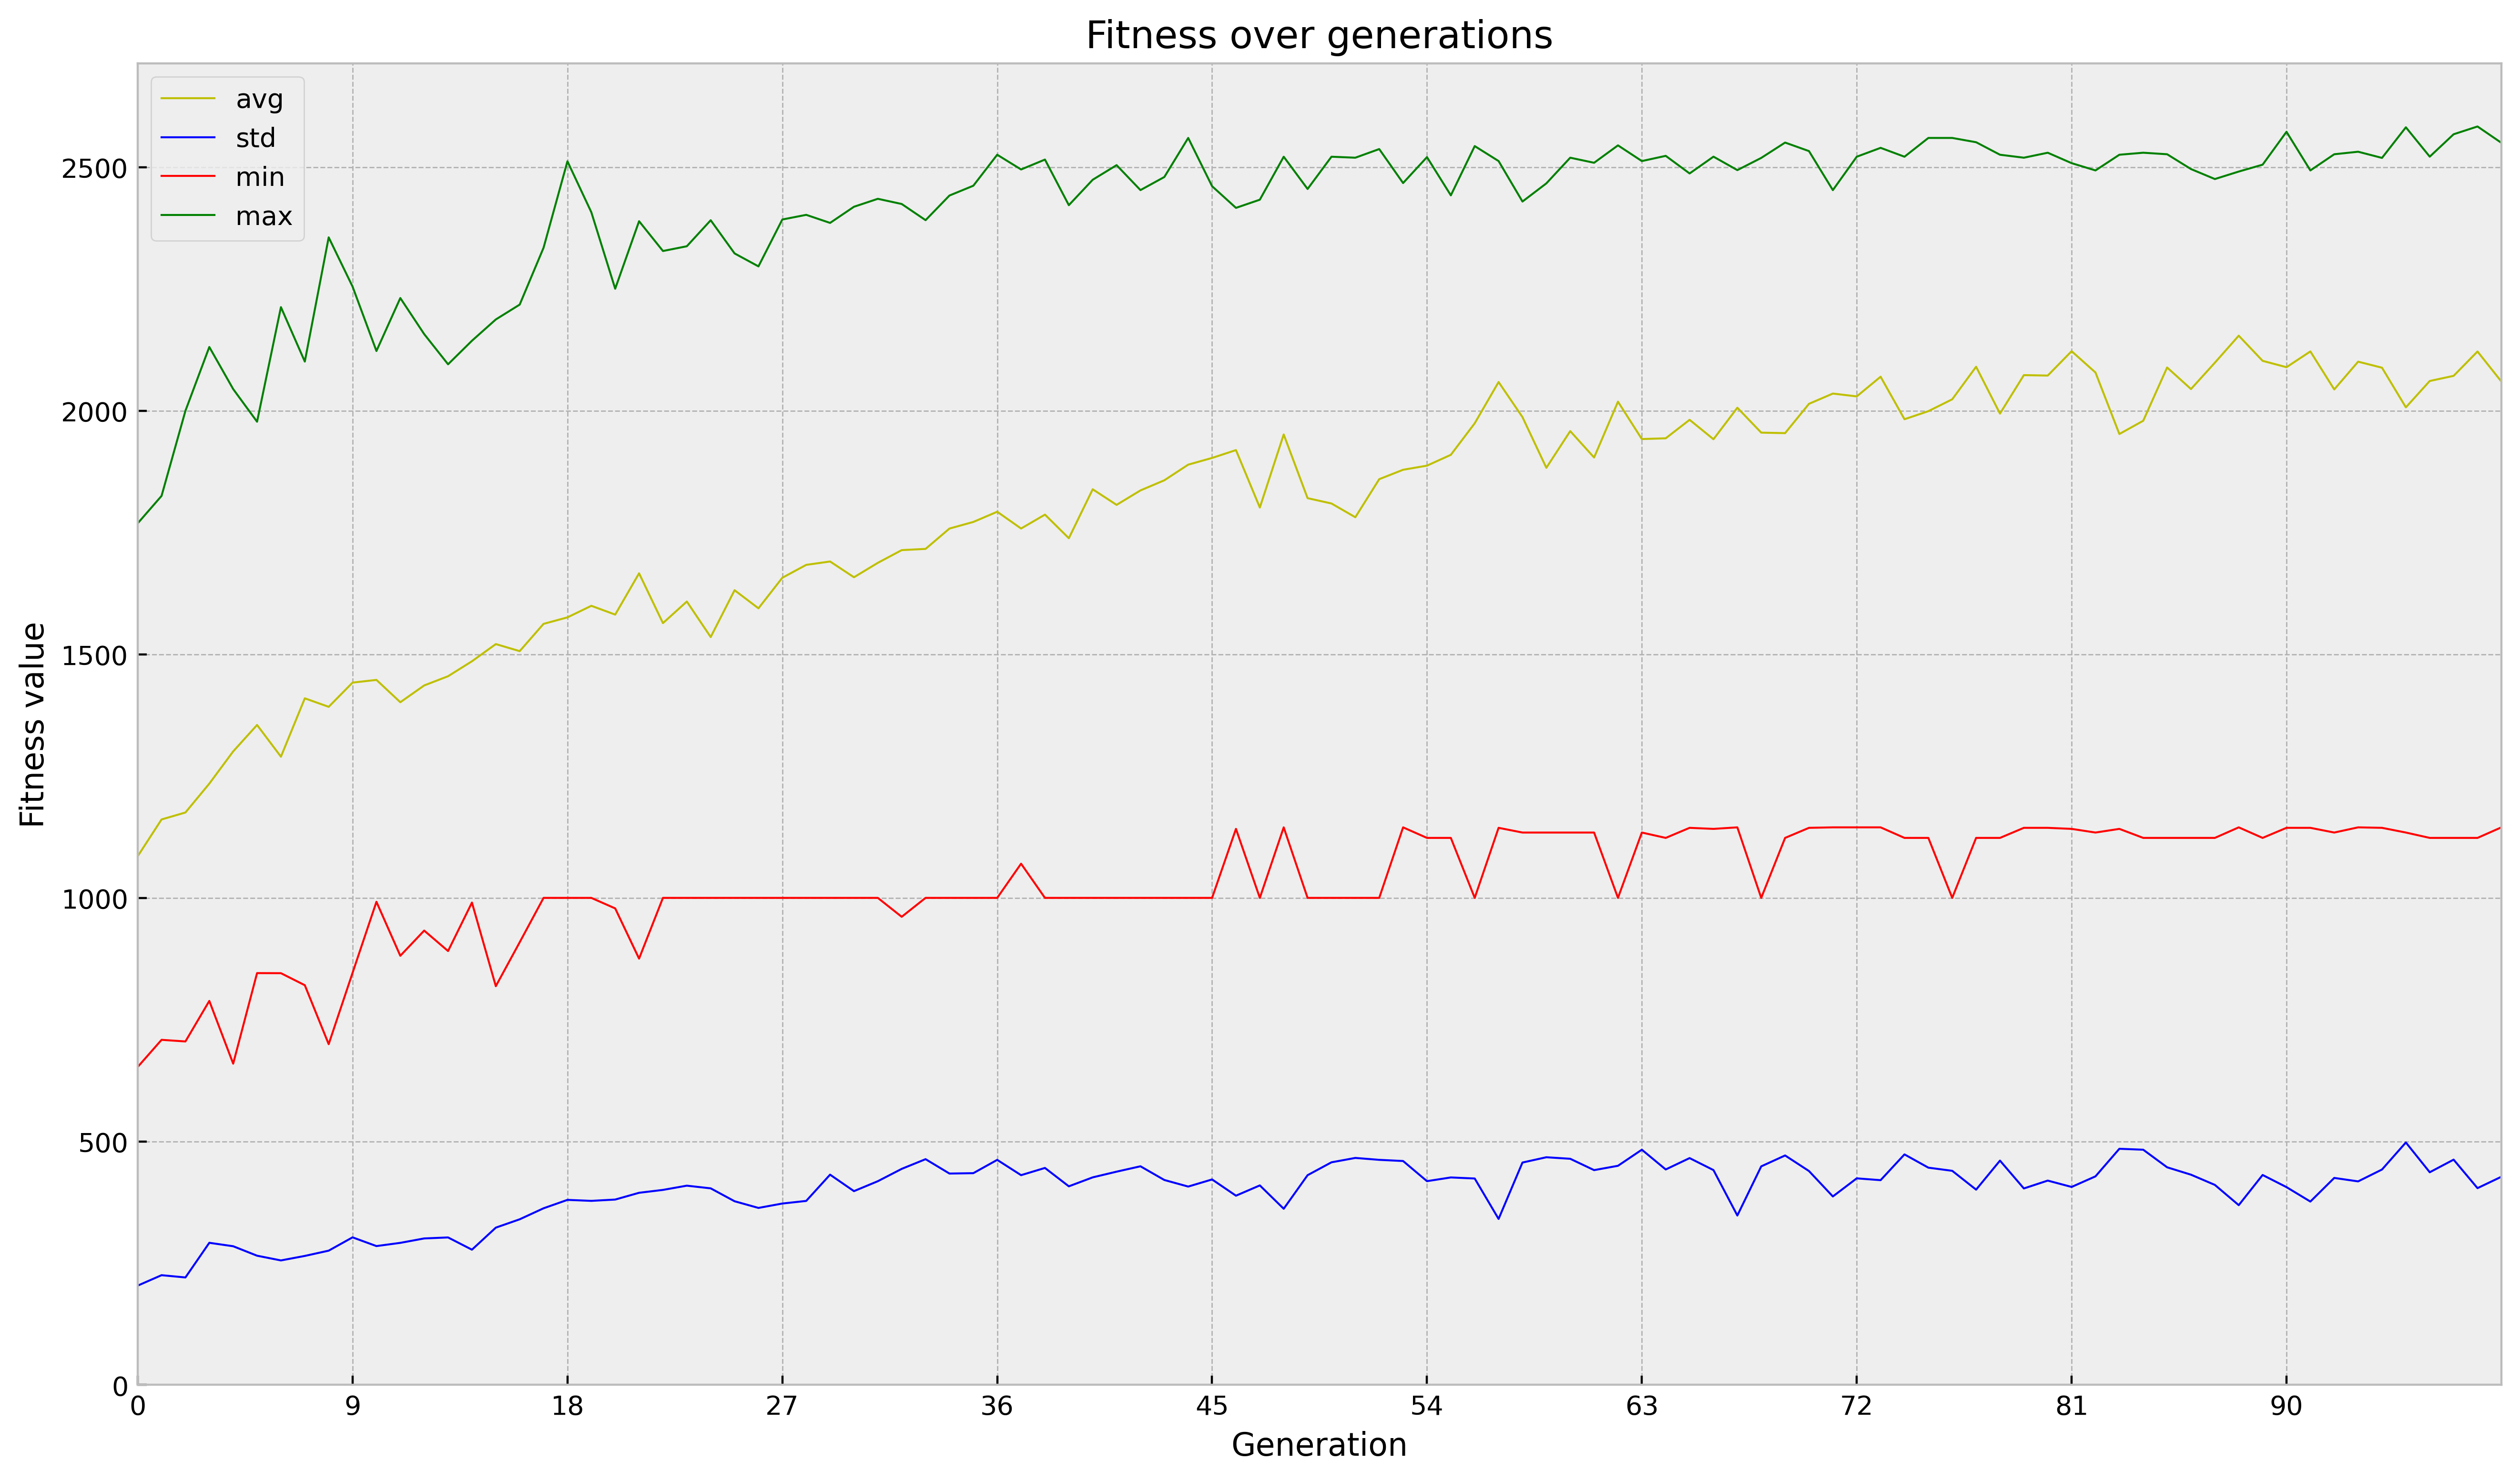

In [8]:
plot_fitness_over_generations(logbook)

In [9]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,-1.250904,-1.167733
1,volume_obv,1.218762,-1.194970
2,volume_cmf,-1.431920,-1.437875
3,volume_fi,-0.167891,-0.198467
4,volume_em,-0.113140,0.281337
...,...,...,...
72,momentum_pvo_signal,0.843186,-1.280914
73,momentum_pvo_hist,1.024615,-2.279155
74,momentum_kama,-3.198092,0.374522
75,others_dr,0.699031,-1.662515


In [10]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2012-11-12        ACTION:          buy          OPEN:     43150.53         MONEY:            0        SHARES:  0.023174686
      DATE:   2015-05-29        ACTION:         sell          OPEN:     55599.86         MONEY:  1288.509318        SHARES:            0
      DATE:   2016-01-22        ACTION:          buy          OPEN:     42636.69         MONEY:            0        SHARES:  0.030220669
      DATE:   2017-09-25        ACTION:         sell          OPEN:     64380.73         MONEY:  1945.628765        SHARES:            0
      DATE:   2020-03-13        ACTION:          buy          OPEN:     37770.04         MONEY:            0        SHARES:  0.051512488
      DATE:   2020-06-12        ACTION:         sell          OPEN:     50163.59         MONEY:  2584.051372        SHARES:            0

-------------------------------------------------------------------------------------------------------------------
  INITIAL MONEY:         1000        FINAL MONEY:  2584.05137

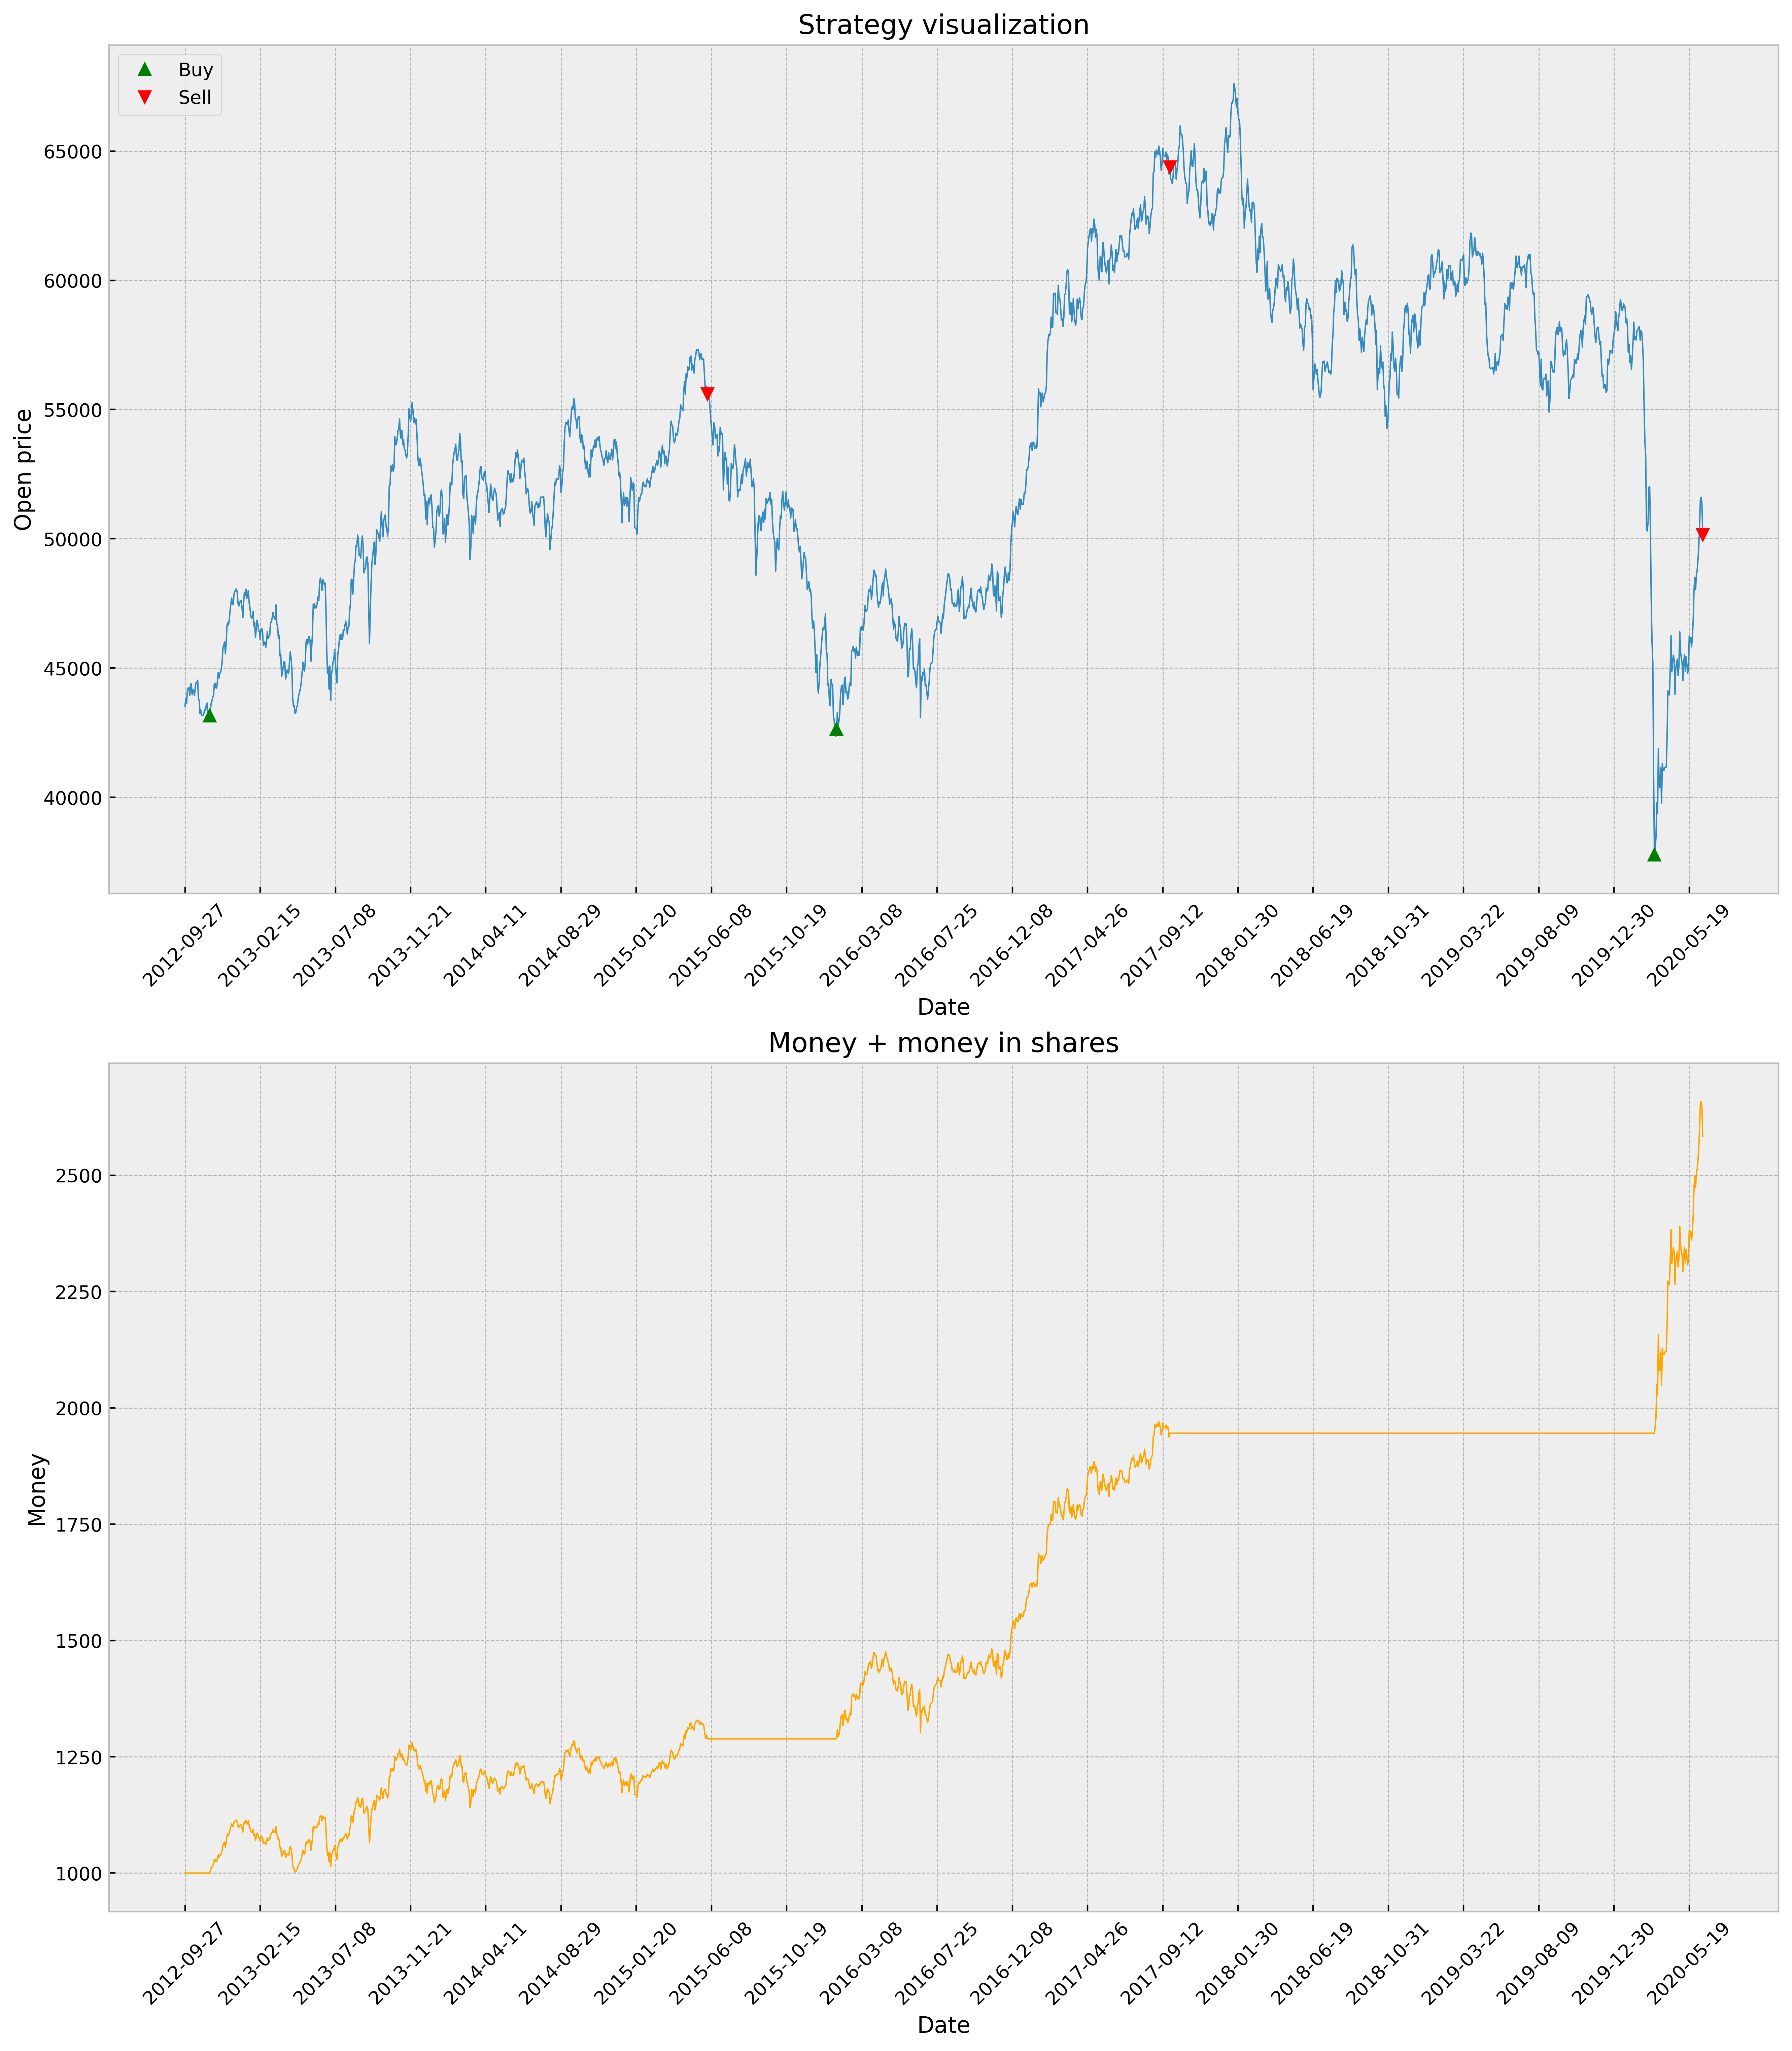

In [11]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)